# Multiple Linear Regression

House pricing example

In [1]:
import pandas as pd
import numpy as np

In [2]:
house_price = [50000,200000,140000,320000,220000,380000] # observations of the target variable 
house_size = [500, 1500, 2500, 3500, 4500, 5500] # predictor or feature 
kitchen_size = [40, 100, 200, 220, 250, 300] # predictor or feature 

In [3]:
house_data = pd.DataFrame({'house_price':house_price, 'house_size': house_size, 'kitchen_size': kitchen_size})
house_data.head()

,house_price,house_size,kitchen_size
0,50000,500,40
1,200000,1500,100
2,140000,2500,200
3,320000,3500,220
4,220000,4500,250


We will use train_test_split function from sklearn (scikit learn) package. This function will return a list of arrays.

1. Features train (X_train)
2. Features test  (X_test)
3. Response train (Y_train)
4. Response test  (Y_test)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
features = ['house_size', 'kitchen_size'] # features names
X = house_data[features] 
Y = house_data['house_price']

In [6]:
X.head()

,house_size,kitchen_size
0,500,40
1,1500,100
2,2500,200
3,3500,220
4,4500,250


In [7]:
Y.head()

0     50000
1    200000
2    140000
3    320000
4    220000
Name: house_price, dtype: int64

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [10]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.9379131934463926


In [11]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -33333.333333333256
The coef (b_1) is  -311.4285714285717
The coef (b_2) is  6619.047619047623


In [12]:
house_price_pred = my_linear_regression.predict(X_test)
house_price_pred 

array([239523.80952381, 511904.76190476])

Now let's evaluate the model performance over the test data

In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, house_price_pred)))

Mean Absolute Error: 256190.47619047627
Mean Squared Error: 79023356009.07034
Root Mean Squared Error: 281110.9318562164


In [14]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [15]:
print('MAPE:', MAPE(Y_test, house_price_pred)*100, "%")

MAPE: 151.3068385248837 %


## Example 2: Boston House Prices

In [16]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [17]:
feature_names= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = pd.DataFrame(data, columns = feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y = pd.Series(target, name='MEDV')
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [21]:
x.shape

(506, 13)

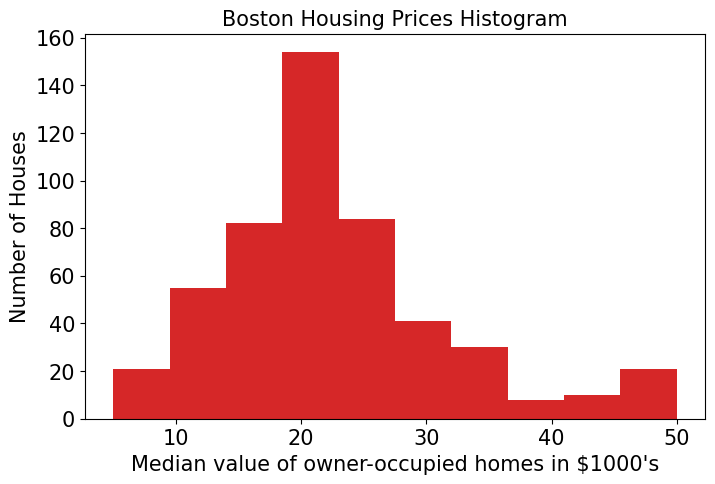

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(y, color = 'Tab:red')
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median value of owner-occupied homes in $1000\'s', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Houses', fontsize = 15)
plt.show()

#### Features Scatterplot

Crime rate vs House prices

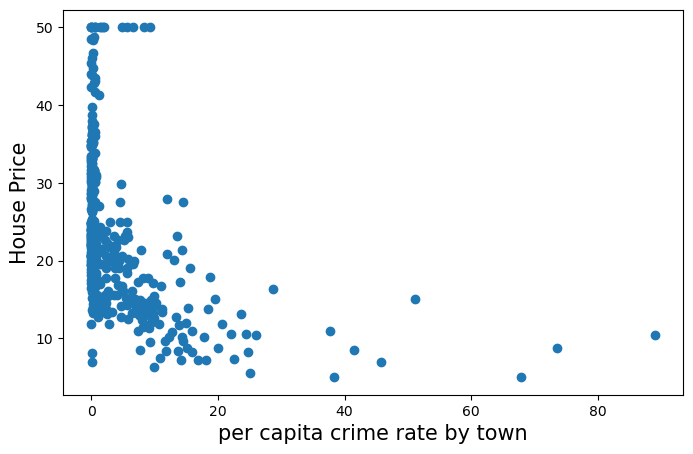

In [23]:
plt.figure(figsize = (8, 5))
plt.scatter(x = x['CRIM'], y = y, color = 'Tab:blue')
plt.xlabel('per capita crime rate by town', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)
plt.show()

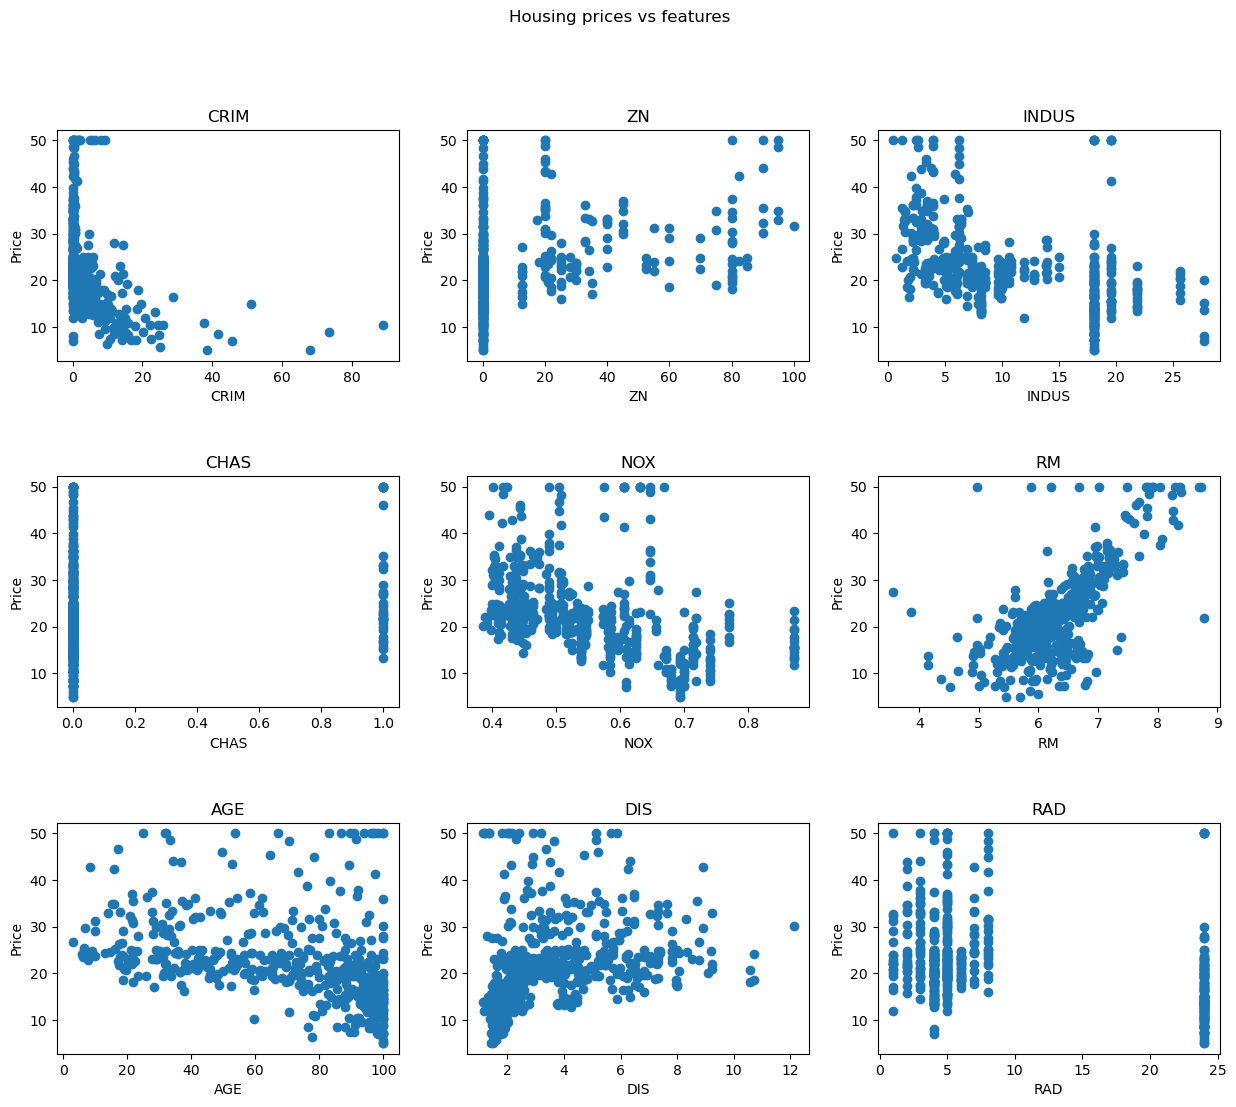

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Housing prices vs features")
for column, ax in zip(feature_names, axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.scatter(x[column], y)
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Price')
plt.show()



## Multiple Linear Regression Model

### Step 1: Create a Dataframe

In [25]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Step 2: Indetify Feature and Response Variable

In [26]:
X = x.copy() # features
Y = pd.Series(y,name='price') # response or target variable

### Step 3: Prepare test and train data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Step 4: Fit Model to Train Data

In [28]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

### Step 5: Test and Evaluate the Model

In [29]:
pred = my_linear_regression.predict(X_test)
pred

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

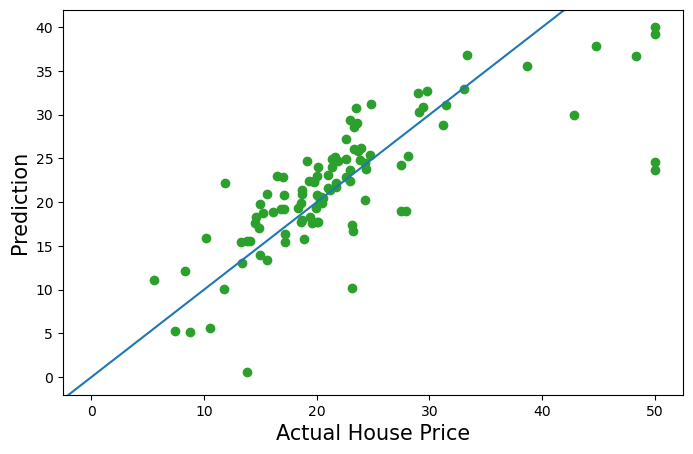

In [30]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:green')
plt.axline(xy1 =[0, 0], slope=1)
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [31]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.7730135569264234


In [32]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(X_train.shape[1]):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  38.09169492630278
The coef (b_1) is  -0.11944344700245477
The coef (b_2) is  0.04477995106651027
The coef (b_3) is  0.005485261681774645
The coef (b_4) is  2.34080360624208
The coef (b_5) is  -16.123604315429574
The coef (b_6) is  3.708709012219148
The coef (b_7) is  -0.003121081780738411
The coef (b_8) is  -1.3863973702786787
The coef (b_9) is  0.24417832698880484
The coef (b_10) is  -0.010989636563079828
The coef (b_11) is  -1.0459211887459732
The coef (b_12) is  0.008110106932704137
The coef (b_13) is  -0.4927927245047151


In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 3.8429092204445046
Mean Squared Error: 33.448979997676524
Root Mean Squared Error: 5.783509315085134
MAPE: 18.356285293906488 %


In [34]:
my_linear_regression.score(X_test, Y_test)

0.589222384918251

## Data Scaling: Standardization and Normalization

1. Standardization: Features will be rescled so that they will have the properties of a standard normal distribution, $\mu = 0$ and $\sigma = 1$.

2. Normalization: The data is scaled to a fixed range-usually 0 to 1.

### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(X_train) 

In [37]:
data_standardized

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

In [38]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [39]:
X_train_standardized = pd.DataFrame(data_standardized, columns = X_train.columns.to_list())
X_train_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.372574,-0.499608,-0.704925,3.664502,-0.424879,0.935678,0.693669,-0.437218,-0.162242,-0.561656,-0.484638,0.371691,-0.411000
1,-0.397099,-0.499608,-0.044878,-0.272888,-1.241859,-0.491181,-1.835528,0.730055,-0.624648,-0.573376,0.336491,0.205012,-0.387681
2,-0.402693,0.771168,-0.886760,-0.272888,-1.111490,0.857849,-0.524621,1.234769,-0.393445,-0.602677,-0.849584,0.366609,-0.181919
3,-0.405769,0.029882,-0.465819,-0.272888,-0.277127,-0.417676,-0.086464,0.861527,-0.509046,-0.538216,-1.488240,0.415732,-0.037886
4,2.774932,-0.499608,0.998884,-0.272888,1.070021,-1.438097,0.715042,-1.021528,1.687378,1.542121,0.792674,-2.613393,1.911362


In [42]:
pd.DataFrame({'mean':X_train_standardized.mean(), 'std':X_train_standardized.std() })

,mean,std
CRIM,-1.758769e-17,1.00124
ZN,4.671731e-17,1.00124
INDUS,-4.396923e-17,1.00124
CHAS,5.716000e-17,1.00124
NOX,-5.496154e-18,1.00124
RM,2.376537e-15,1.00124
AGE,-1.461977e-16,1.00124
DIS,-8.793846e-18,1.00124
RAD,-5.935846e-17,1.00124
TAX,6.815230e-17,1.00124


### Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_standardized = scaler.fit_transform(X_train) 

In [45]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [46]:
X_train_standardized = pd.DataFrame(data_standardized, columns = X_train.columns.to_list())
X_train_standardized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.003954,0.000,0.210411,1.0,0.251029,0.649550,0.881565,0.154077,0.304348,0.229008,0.510638,0.986888,0.226383
1,0.001713,0.000,0.379399,0.0,0.057613,0.459858,0.150360,0.375547,0.130435,0.225191,0.702128,0.949670,0.231206
2,0.001202,0.300,0.163856,0.0,0.088477,0.639203,0.529351,0.471307,0.217391,0.215649,0.425532,0.985753,0.273759
3,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.400491,0.173913,0.236641,0.276596,0.996722,0.303546
4,0.291495,0.000,0.646628,0.0,0.604938,0.333972,0.887745,0.043215,1.000000,0.914122,0.808511,0.320339,0.706667


In [47]:
pd.DataFrame({'mean':X_train_standardized.mean(), 'variance':X_train_standardized.var() })

,mean,variance
CRIM,0.037990,0.008366
ZN,0.117946,0.055870
INDUS,0.390889,0.065711
CHAS,0.069307,0.064664
NOX,0.351617,0.056187
RM,0.525158,0.017718
AGE,0.681022,0.083789
DIS,0.237032,0.036088
RAD,0.365368,0.141806
TAX,0.411916,0.106317


In [48]:
pd.DataFrame({'min':X_train_standardized.min(), 'max':X_train_standardized.max() })

,min,max
CRIM,0.0,1.0
ZN,0.0,1.0
INDUS,0.0,1.0
CHAS,0.0,1.0
NOX,0.0,1.0
RM,0.0,1.0
AGE,0.0,1.0
DIS,0.0,1.0
RAD,0.0,1.0
TAX,0.0,1.0


## Linear Regression Feature Importance

We can fit a linear regression model on the regression dataset and retrieve the coef_ property that contains the coefficients for each feature.

These coefficients can provide the basis for crude feature importance score.

**Step 1:** Normalization

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

**Step 2:** Fit model

In [55]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = x.copy() # features
Y = y.copy() # response or target variable
my_linear_regression.fit(scaler.fit_transform(X), Y)

LinearRegression()

**Step 3:** Extract feature importance and summarize

In [56]:
summary = pd.DataFrame({'Features':feature_names, 'Coefs':my_linear_regression.coef_})
summary

,Features,Coefs
0,CRIM,-0.928146
1,ZN,1.081569
2,INDUS,0.140900
3,CHAS,0.681740
4,NOX,-2.056718
5,RM,2.674230
6,AGE,0.019466
7,DIS,-3.104044
8,RAD,2.662218
9,TAX,-2.076782


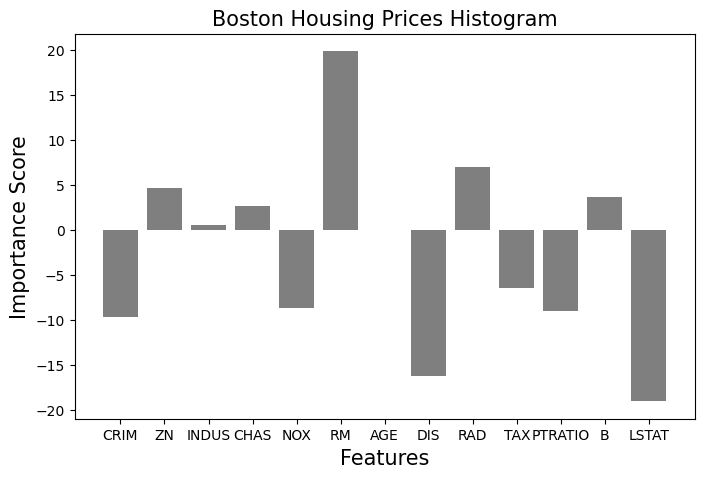

In [52]:
# min max scaler
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Coefs'] , color = 'Tab:gray') 
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

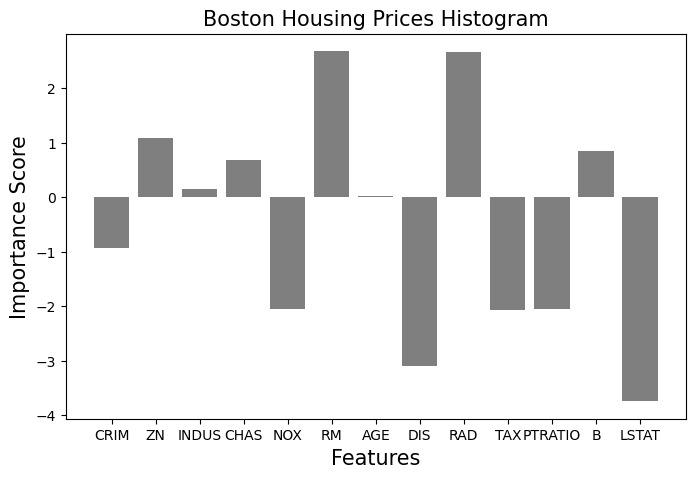

In [57]:
# result from standard scaler
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Coefs'] , color = 'Tab:gray') 
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

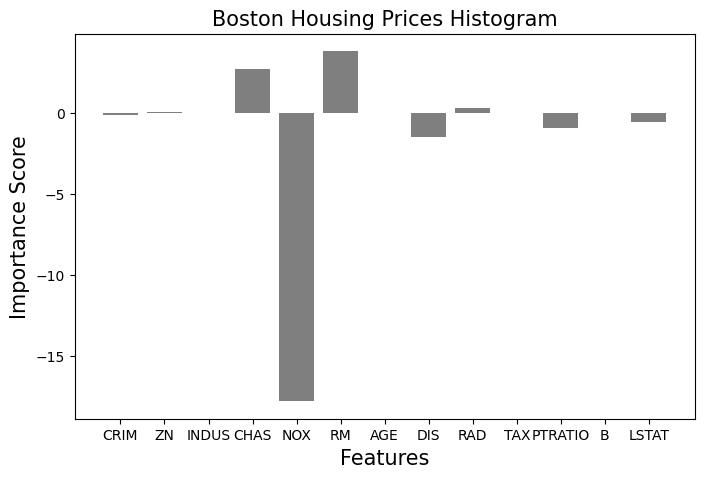

In [53]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = x.copy() # features
Y = y.copy() # response or target variable
my_linear_regression.fit(X, Y)
summary = pd.DataFrame({'Features':feature_names, 'Coefs':my_linear_regression.coef_})
plt.figure(figsize = (8, 5))
# plot feature importance with a bar chart
plt.bar(x = summary['Features'], height = summary['Coefs'] , color = 'Tab:gray') 
plt.title('Boston Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()